# The Efficient Frontier - Part II

Let's start by loading the returns and generating the expected returns vector and the covariance matrix

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import edhek_risk_kit as erk
import numpy as np

In [3]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [7]:
def portfolio_return(weights, returns):
    return weights.T @ returns

In [9]:
def portfolio_vol(weights, covmat):
    return (weights.T @ covmat @ weights) ** 5

In [14]:
l = ["Food", "Beer", "Smoke", "Coal"]

In [15]:
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [20]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [23]:
weights = np.repeat(1/4, 4)
erk.portfolio_return(weights, er[l])

np.float64(0.19511097196038385)

In [29]:
erk.portfolio_vol(weights, cov.loc[l, l])

np.float64(0.055059195776437045)

## 2 Asset Frontier

In [31]:
l = ["Games", "Fin"]

In [33]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
# weights

<Axes: xlabel='Vol', ylabel='R'>

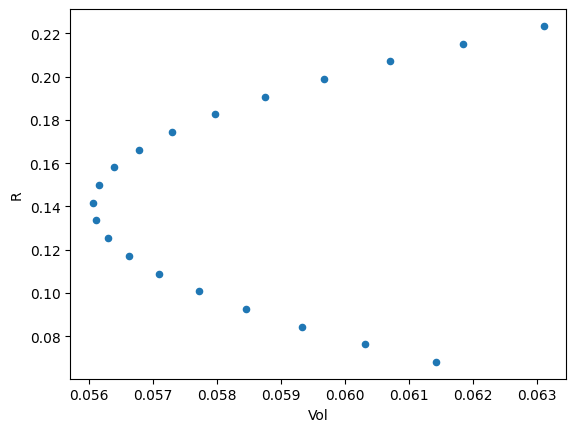

In [40]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l, l]) for w in weights]
ef = pd.DataFrame({"R": rets, "Vol": vols})
ef.plot.scatter(x="Vol", y="R")

<Axes: xlabel='Volatility'>

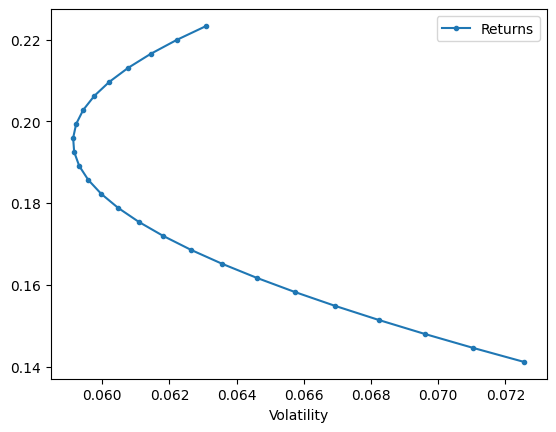

In [44]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l], cov.loc[l, l])